In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data 
data=pd.read_csv("C:/Users/Ayushi Chaudhuri/Desktop/Malware 2.0/Malware-drebin - Copy/data/drebin-215-dataset-5560malware-9476-benign.csv", header=None)

In [3]:
data.shape

(15036, 216)

In [4]:
ro,col = data.shape

In [5]:
X = data.iloc[:,range(0,col-1)] #Feature set
y = data.iloc[:,col-1] #Class labels S, B --> Binary Classification 


# Univariate Feature Selection for Logistic Regression

In [7]:
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
yb = lb.fit_transform(y).ravel()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score, accuracy_score


#selection_percentage = [.25,.40,.55,.70,.85,1]
selection_percentage = [.80,.82,.84,.86,.88,.90]
results_all =[]

all_importance = []

for i in selection_percentage:
    sl = math.floor((col-1)*i)
    X_new = SelectKBest(chi2, k=sl).fit_transform(X, y)
    X_train,X_test, y_train, y_test =train_test_split(X_new,yb,test_size=0.20, random_state = 40)
    clf = LogisticRegression(random_state=100,solver='saga',max_iter=300).fit(X_train, y_train)
    
    # get importance
    importance = clf.coef_[0]
    
    all_importance.append(importance)
    
    y_pred_lr =clf.predict(X_test)
    
    mc_lr=matthews_corrcoef(y_test, y_pred_lr)
    f1_lr=f1_score(y_test, y_pred_lr)

    acc_lr= accuracy_score(y_test, y_pred_lr)
    print('--------------------------------')
    print('Percentage: {}'.format(i))
    print('Selected feature:{}'.format(sl))
    print('Accuracy:{}'.format(acc_lr))
    print('F1-score:{}'.format(f1_lr))
    print('MCC-score:{}'.format(mc_lr))
    print('--------------------------------')
    
    results_all.append([i, sl, acc_lr,f1_lr,mc_lr])

--------------------------------
Percentage: 0.8
Selected feature:172
Accuracy:0.9780585106382979
F1-score:0.9688972667295005
MCC-score:0.9519574063681929
--------------------------------
--------------------------------
Percentage: 0.82
Selected feature:176
Accuracy:0.9787234042553191
F1-score:0.9698681732580038
MCC-score:0.9534283153370361
--------------------------------
--------------------------------
Percentage: 0.84
Selected feature:180
Accuracy:0.9780585106382979
F1-score:0.9688972667295005
MCC-score:0.9519574063681929
--------------------------------
--------------------------------
Percentage: 0.86
Selected feature:184
Accuracy:0.9783909574468085
F1-score:0.96938294865756
MCC-score:0.9526927664863191
--------------------------------
--------------------------------
Percentage: 0.88
Selected feature:189
Accuracy:0.9773936170212766
F1-score:0.967984934086629
MCC-score:0.9505173202370221
--------------------------------
--------------------------------
Percentage: 0.9
Selected f

In [8]:
results_all = pd.DataFrame(results_all)
results_all

,0,1,2,3,4
0,0.80,172,0.978059,0.968897,0.951957
1,0.82,176,0.978723,0.969868,0.953428
2,0.84,180,0.978059,0.968897,0.951957
3,0.86,184,0.978391,0.969383,0.952693
4,0.88,189,0.977394,0.967985,0.950517
5,0.90,193,0.978059,0.968897,0.951957


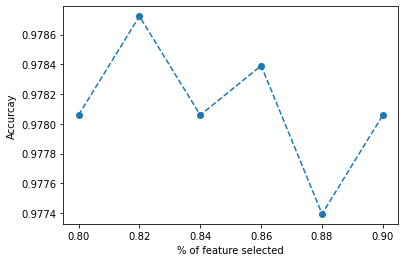

In [9]:
import matplotlib.pyplot as plt 
plt.plot(results_all.iloc[:,0],results_all.iloc[:,2], 'o--') #percentage selection vs accuracy
plt.xlabel('% of feature selected')
plt.ylabel('Accurcay')
plt.show()

Max accurcay is 97.87% for 82.0% of the whole features


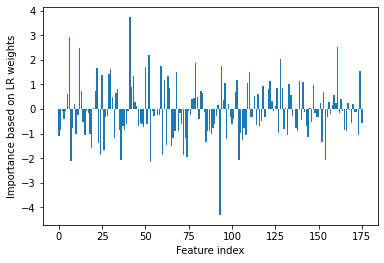

In [41]:
acc= results_all.iloc[:,2] #acuracy values
max_indx = np.argmax(acc)
importance  = all_importance[max_indx] #fetching max accurcay parameters of LR

#summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

print('Max accurcay is {}% for {}% of the whole features'.format(round(acc[max_indx]*100,2),selection_percentage[max_indx]*100))
#plot feature importance
plt.bar([X for X in range(len(importance))], importance)
plt.xlabel('Feature index')
plt.ylabel('Importance based on LR weights')
plt.show()

In [29]:
indx = np.where(importance >0)
np.size(indx)
selection=[]
selection.append(indx)
selection = selection[0][0]
print('Selected indices based on importance Features are:')
print(selection)

# X_selected = X.iloc[:,selection]
# y_selected = yb.iloc[selection,0]

Selected indices based on importance Features are:
[  5   6   9  12  13  20  21  22  25  29  30  31  33  34  41  42  43  44
  45  50  52  56  59  61  63  64  68  77  78  79  80  82  83  92  94  95
  96  98 102 103 109 110 113 115 118 121 122 123 125 126 128 129 131 133
 134 139 141 145 147 151 153 156 158 159 160 161 163 167 170 174]
